In [1]:
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt

def BrownianMotion(stepsize=0.001, time=1):
    return np.concatenate(([0], np.cumsum(ra.normal(scale=np.sqrt(stepsize), size=int(time/stepsize)))))

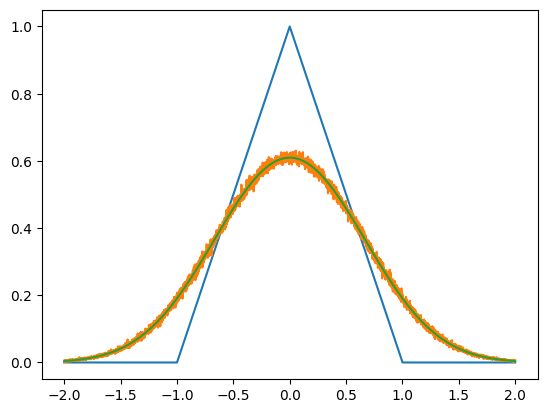

In [2]:
# Temperature of a rod

def g(x):
    if np.abs(x) <= 1:
        return 1 - np.abs(x)
    else:
        return 0

X = np.array([-2 + i * 0.001 for i in range(4001)])
GX = np.array([g(x) for x in X])

def f(t,x):
    sum = 0
    for _ in range(1000):
        B = x + BrownianMotion(stepsize=0.001, time=t)
        sum += g(B[-1])
    return sum/1000

def p(s,x,y):
    return np.exp(-(y-x)**2/(2*s))/np.sqrt(2*np.pi*s)

def truef(t,x):
    return sum([g(y) * p(t,x,y) * 0.001 for y in X]) 

FX = np.array([f(0.25, x) for x in X])
TFX = np.array([truef(0.25, x) for x in X])

plt.plot(X, GX)
plt.plot(X, FX)
plt.plot(X, TFX)
plt.show()

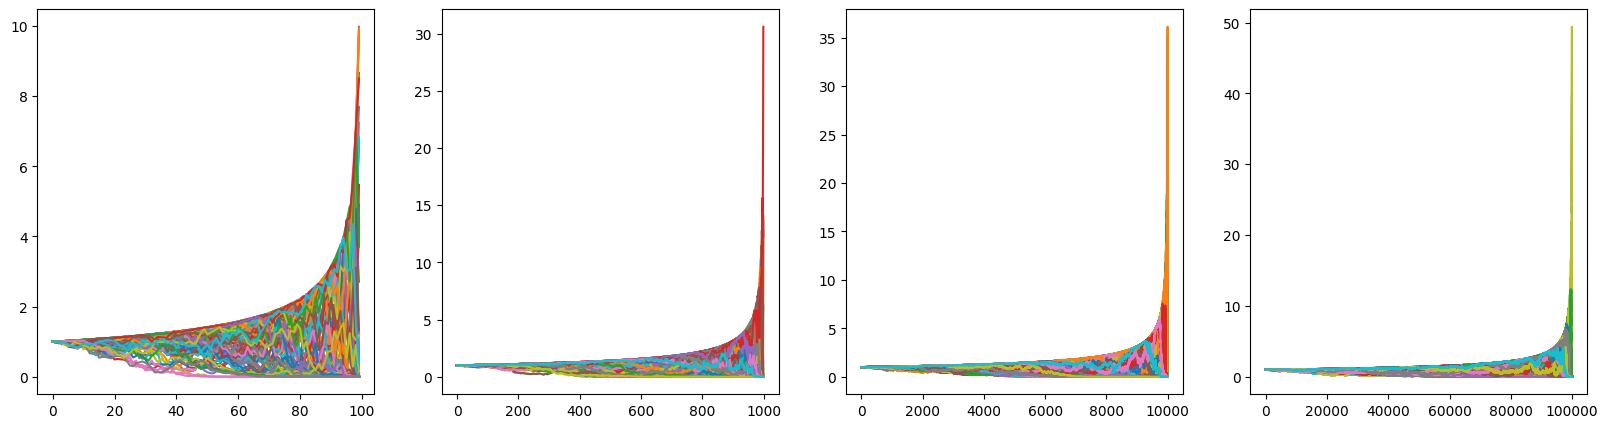

[2.8052634686184748, 3.6758083452828405, 4.335750253270383, 3.504529477654639]


In [11]:
# A strange martingale

plt.figure(figsize=(20,5))

Emax = [0,0,0,0]

for i in range(4):
    plt.subplot(1,4,i+1)

    maxsum = 0

    for _ in range(100):
        eps = 10**(-2-i)
        T = np.array([j*eps for j in range(int(10**(i+2)))])
        B = BrownianMotion(stepsize=eps, time=1-eps)
        M = np.exp(-B**2/(2*(1-T))) / np.sqrt(1-T)

        plt.plot(M)

        maxsum += np.max(M)

    Emax[i] = maxsum/100 

plt.show()
print(Emax)

In [12]:
# Simulating SDEs

def EulerMaruyama(sigma, mu, x0, dt=0.01, T=1):
    X = [x0]
    for _ in range(int(T / dt)):
        dB = ra.normal(scale=np.sqrt(dt))
        X.append(
            X[-1]
            + sigma(X[-1]) * dB
            + mu(X[-1]) * dt
        )
    return X

def Milstein(sigma, sigmaprime, mu, x0, dt=0.01, T=1):
    X = [x0]
    for _ in range(int(T/dt)):
        dB = ra.normal(scale=np.sqrt(dt))
        X.append(
            X[-1]
            + sigma(X[-1]) * dB
            + mu(X[-1]) * dt
            + 0.5 * sigmaprime(X[-1]) * sigma(X[-1]) * (dB**2 - dt)
        )
    return X

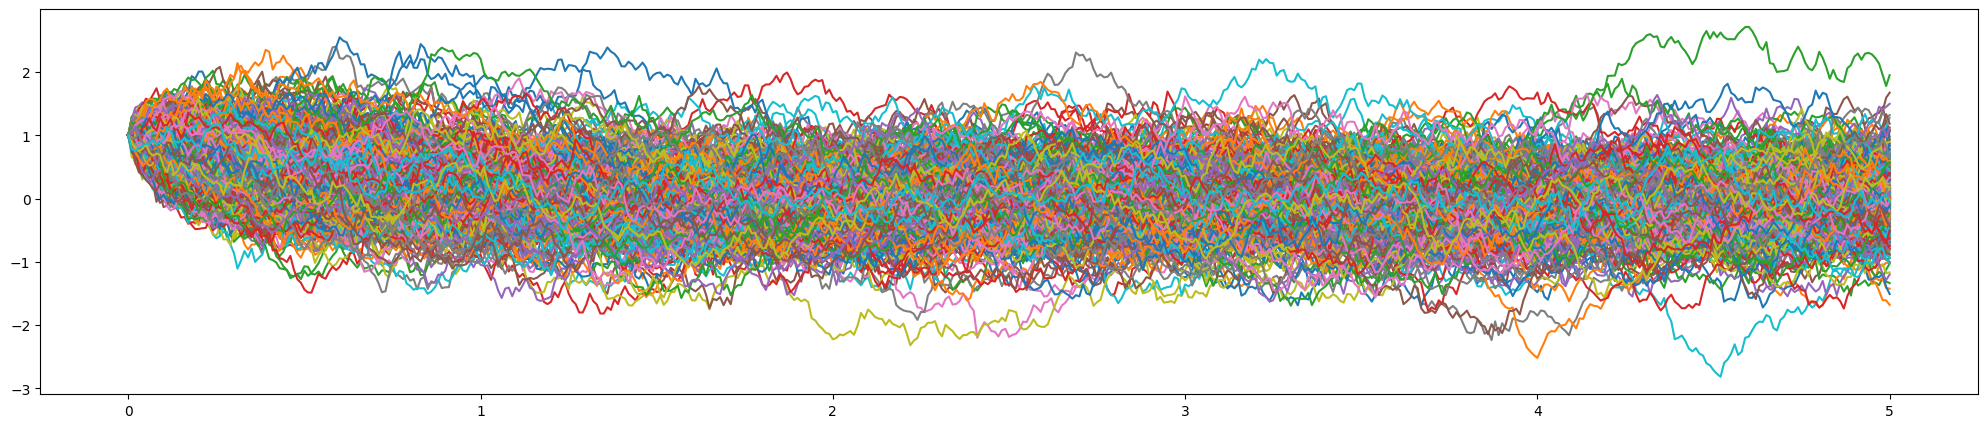

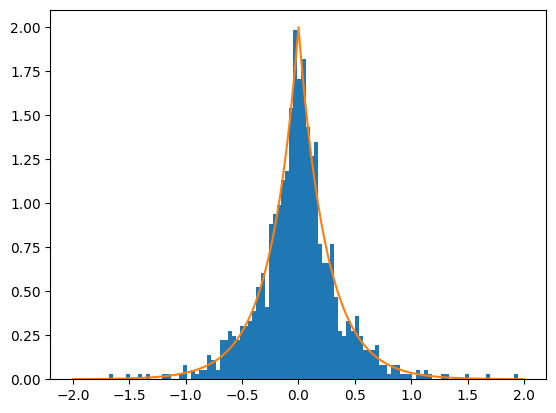

In [18]:
# Smoluchowski's equation

plt.figure(figsize=(25,5))

T = np.array([i*0.01 for i in range(501)])

X5 = []

for _ in range(1000):
    X = EulerMaruyama(lambda x : 1, lambda x : -2 if x >= 0 else 2, x0=1, T=5)
    X5.append(X[-1])
    plt.plot(T,X)

plt.show()

X = np.array([-2 + i * 0.01 for i in range(401)])

plt.figure()
plt.hist(X5, density=True, bins=100)
plt.plot(X, 2 * np.exp(- 4 * np.abs(X)))
plt.show()

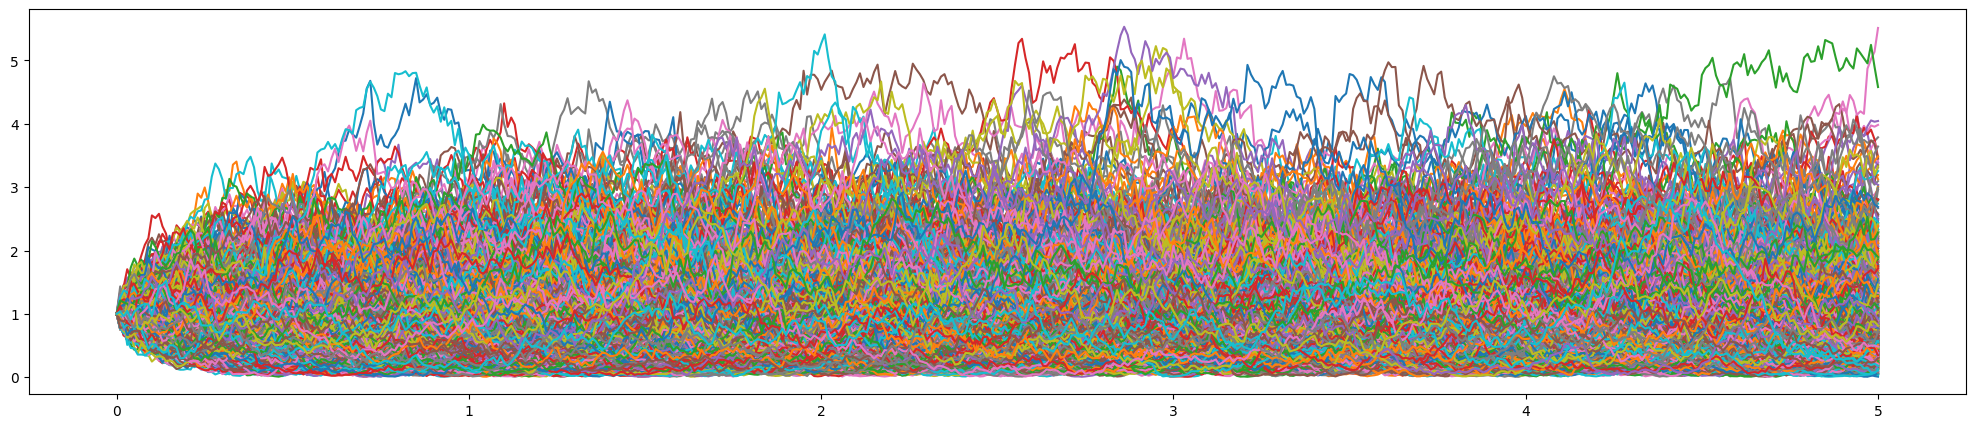

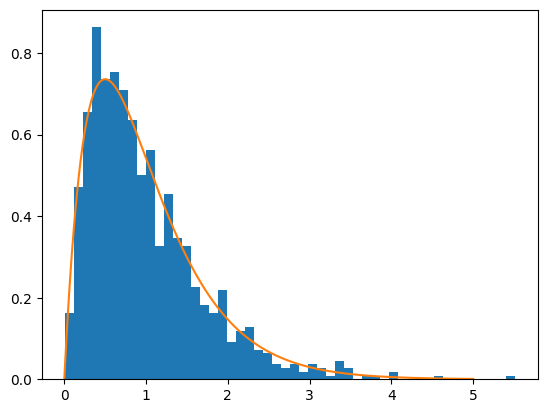

In [21]:
# Invariant distribution of the CIR model

plt.figure(figsize=(25,5))

T = np.array([i*0.01 for i in range(501)])

X5 = []

for _ in range(1000):
    X = Milstein(lambda x : np.sqrt(x), lambda x : 0.5 / np.sqrt(x), lambda x : 1 - x, x0=1, T=5)
    X5.append(X[-1])
    plt.plot(T,X)

plt.show()

X = np.array([i * 0.01 for i in range(501)])

plt.figure()
plt.hist(X5, density=True, bins=50)
plt.plot(X, 4 * X * np.exp(-2 * X))
plt.show()